# **Convolution**
* **Basic concepts learnt from: A Deep understanding of Deep Learning (with Python intro) - Mark X Cohen (Udemy) - https://www.udemy.com/course/deeplearning_x**
* **Extended learning and understanding by VigyannVeshi**

### Basics of Convolution

In [1]:
# import libraries
import numpy as np

# for convolution
from scipy.ndimage import convolve

# to read an image from url
from imageio.v2 import imread

import matplotlib.pyplot as plt

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

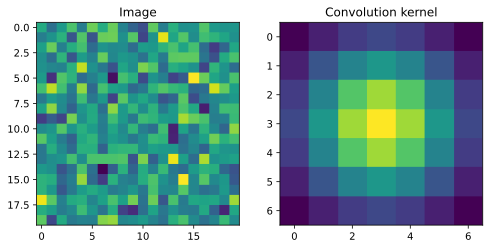

In [2]:
# Manual random image generation
imgN=20
image=np.random.randn(imgN,imgN)

# convolution kernel
kernelN=7
X,Y=np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel=np.exp(-(X**2+Y**2)/7)

# plotting
fig,ax=plt.subplots(1,2,figsize=(8,6))
ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Convolution kernel')

plt.show()

**Function to perform convolution manually**

In [3]:
def Convolve(img: np.ndarray,kernel:np.ndarray,pad:bool=True)->np.ndarray:
    '''
    Convolve function performs the convolution operation on the input image with the given kernel.
    
    Args:
        img (np.ndarray):       The input image.
        kernel (np.ndarray):    The convolution kernel.
        pad (bool, optional):   Whether to pad the image or not. Default is True.
                                Image is padded with zeros by default
    Returns:
        np.ndarray: The convolved image.
    '''
    kernel_size=kernel.shape[0] ### get the size of kernel (usually square kernel with odd size).
    padding=kernel_size//2 ### decide the padding size.
    print(img.shape)
    if pad:
        ### creating an ndarray of zeros of shape of image with padding appended on each side.
        if len(img.shape)==3:
            padded_img=np.zeros((img.shape[0]+2*padding,img.shape[1]+2*padding,3))
        else:
            padded_img=np.zeros((img.shape[0]+2*padding,img.shape[1]+2*padding))
        padded_img[padding:padded_img.shape[0]-padding,padding:padded_img.shape[1]-padding]=img
    else:
        ### if there is padding, then padding image is the original image.
        padded_img=img

    ### for both 2D and 3D convolution, the result is 2D.
    result=np.zeros(shape=(padded_img.shape[0]-2*padding,padded_img.shape[1]-2*padding))
    ### for 3D convolution, create a 3D kernel for given 1D to apply convolution to all three channels.
    kernel=np.dstack((kernel,kernel,kernel)) if len(padded_img.shape)==3 else kernel

    ### leaving sufficient place (padding) perform convolution (dot product) and store the value in result.
    for i in range(padding,padded_img.shape[0]-padding):
        for j in range(padding,padded_img.shape[1]-padding):
            ### if the image is colored then all channels must be included and a 3D kernel needs to be used.
            if len(padded_img.shape)==3:
                result[i-padding,j-padding]=np.sum(kernel*padded_img[i-kernel_size//2:i+(kernel_size//2)+1,j-kernel_size//2:j+(kernel_size//2)+1,:])
            else:   
                result[i-padding,j-padding]=np.sum(kernel*padded_img[i-kernel_size//2:i+(kernel_size//2)+1,j-kernel_size//2:j+(kernel_size//2)+1])
    ### return the result
    return result   

(20, 20)


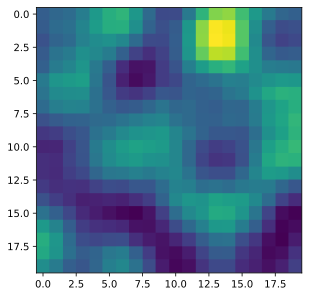

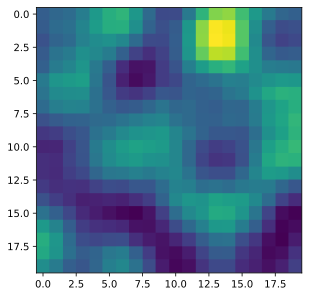

In [4]:
# 2D convolution
image_conv_out=Convolve(image,kernel)
plt.imshow(image_conv_out)
plt.show()

sp_image_conv_out=convolve(image,kernel,mode="constant",cval=0.0)
plt.imshow(sp_image_conv_out)
plt.show()


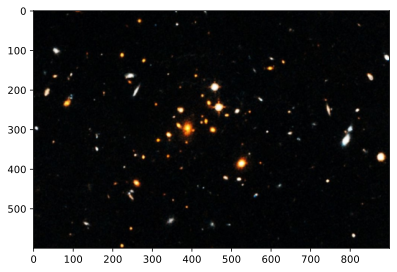

(600, 900, 3)


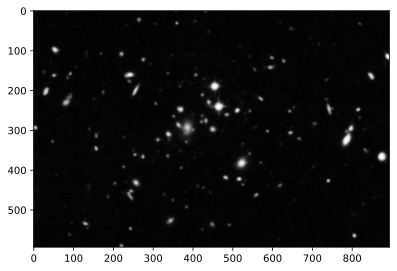

In [5]:
# 3D Convolution
image2=imread("https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201601/MIT-Galaxy-Cluster_0.jpg?itok=3Y7QyIIL")
plt.imshow(image2)
plt.show()
image2_conv_out=Convolve(image2,kernel,pad=False)
plt.imshow(image2_conv_out,cmap="gray")
plt.show()

**Implementing convolution on real images**

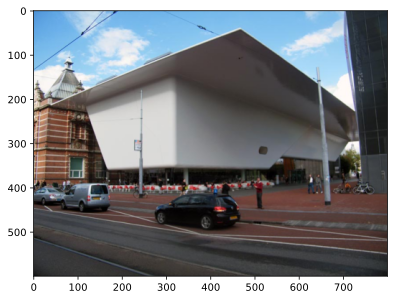

In [6]:
image3=imread("https://johannesvermeer.info/wp-content/uploads/2017/01/ams-stedelijk8664bathtub.jpg")

v_kernel=np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])
h_kernel=np.array([[1,1,1],
                   [0,0,0],
                   [-1,-1,-1]])

plt.imshow(image3)
plt.show()

**Normalize function helps to get the image output in a range of [min_val,max_val]. It is useful specically in the case of sharpening, as the output has negative elements**

In [7]:
def Normalize(img:np.ndarray,min_val:np.float32=0.0,max_val:np.float32=1.0)->np.ndarray:
    '''
        Normalize function helps to get the image output in a range of [0,1].
        It is useful specically in the case of sharpening, as the output has negative elements

        Args:
            img (np.ndarray): The input image.
            min_val: minimum value of pixel expected in output
            max_val: maximum value of pixel expected in output
        Returns:
            np.ndarray: The normalized image
    '''
    min=np.min(img) # finds the minimum value in the image
    max=np.max(img) # finds the maximum value in the image
    min_img=np.ones(img.shape)*min
    min_val_img=np.ones(img.shape)*min_val
    img=min_val_img+(img-min_img)*((max_val-min_val)/(max-min))
    return img

(600, 800)


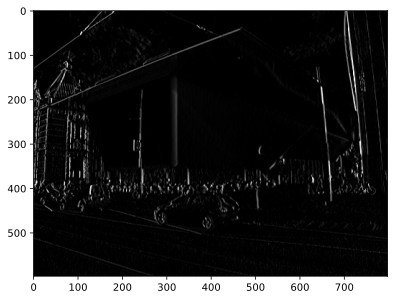

(600, 800)


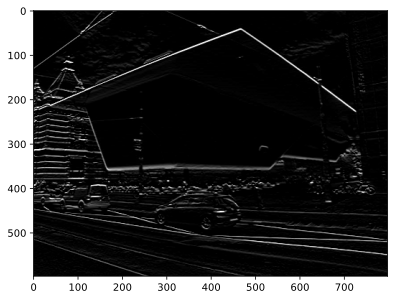

In [8]:
# 2D convolution for real image using manual function 
import cv2 as cv
image3_conv_out_v=Convolve(cv.cvtColor(image3,cv.COLOR_RGB2GRAY),v_kernel,pad=False)
plt.imshow(image3_conv_out_v,cmap="gray",vmax=255,vmin=0)
plt.show()
image3_conv_out_h=Convolve(cv.cvtColor(image3,cv.COLOR_RGB2GRAY),h_kernel,pad=False)
plt.imshow(image3_conv_out_h,cmap="gray",vmax=255,vmin=0)
plt.show()

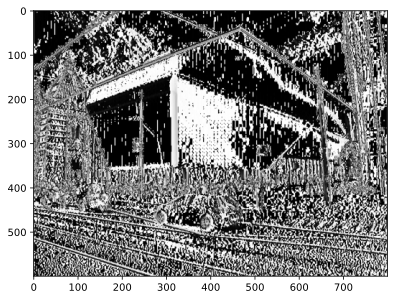

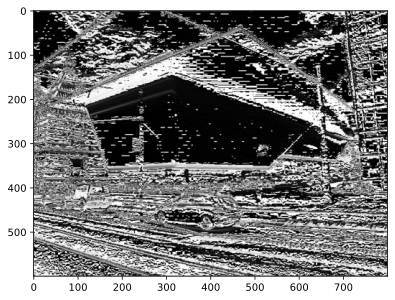

In [9]:
# 2D convolution of real image using existing convolve function of scipy 
import cv2 as cv
image3_conv_out_v=convolve(cv.cvtColor(image3,cv.COLOR_RGB2GRAY),v_kernel,mode="constant",cval=0.0)
plt.imshow(image3_conv_out_v,cmap="gray",vmax=255,vmin=0)
plt.show()
image3_conv_out_h=convolve(cv.cvtColor(image3,cv.COLOR_RGB2GRAY),h_kernel,mode="constant",cval=0.0)
plt.imshow(image3_conv_out_h,cmap="gray",vmax=255,vmin=0)
plt.show()

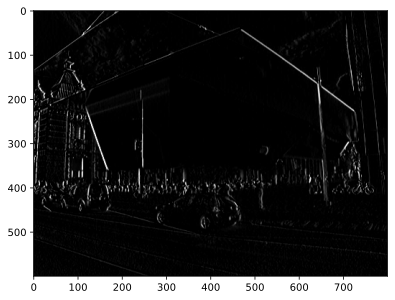

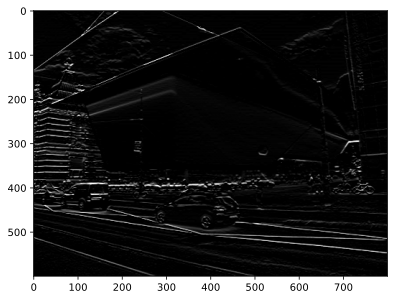

In [10]:
# 2D convolution of real image using manual convolution function implemented in course:
# Deep understanding of Deep Learning by Mike X Cohen


import cv2 as cv
image3_conv_out_v= np.zeros((image3.shape[0:2]))

### Applying vertical kernel
v_kernel=np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

halfKr=v_kernel.shape[0]//2

image=cv.cvtColor(image3,cv.COLOR_RGB2GRAY)

for rowi in range(halfKr,image3.shape[0]-halfKr):
  for coli in range(halfKr,image3.shape[1]-halfKr):

    # cut out a piece of the image
    pieceOfImg = image[rowi-halfKr:rowi+halfKr+1,:]      # get the rows
    pieceOfImg = pieceOfImg[:,coli-halfKr:coli+halfKr+1] # extract the columns

    # dot product: element-wise multiply and sum (and flip the kernel for "real convolution")
    dotprod = np.sum( pieceOfImg*v_kernel[::-1,::-1] )

    # store the result for this pixel
    image3_conv_out_v[rowi,coli] = dotprod
    
plt.imshow(image3_conv_out_v,cmap="gray",vmax=255,vmin=0)
plt.show()

### Applying horizontal kernel
h_kernel=np.array([[1,1,1],
                   [0,0,0],
                   [-1,-1,-1]])
image3_conv_out_h= np.zeros((image3.shape[0:2]))

for rowi in range(halfKr,image3.shape[0]-halfKr):
  for coli in range(halfKr,image3.shape[1]-halfKr):

    # cut out a piece of the image
    pieceOfImg = image[rowi-halfKr:rowi+halfKr+1,:]      # get the rows
    pieceOfImg = pieceOfImg[:,coli-halfKr:coli+halfKr+1] # extract the columns

    # dot product: element-wise multiply and sum (and flip the kernel for "real convolution")
    dotprod = np.sum( pieceOfImg*h_kernel[::-1,::-1] )

    # store the result for this pixel
    image3_conv_out_h[rowi,coli] = dotprod
    
plt.imshow(image3_conv_out_h,cmap="gray",vmax=255,vmin=0)
plt.show()


(600, 800, 3)


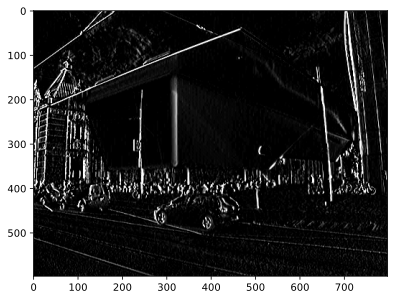

(600, 800, 3)


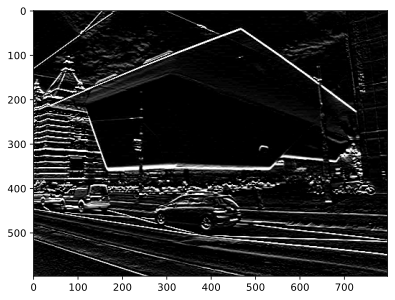

In [11]:
# 3D convolution
image3_conv_out_v=Convolve(image3,v_kernel,pad=False)
plt.imshow(image3_conv_out_v,cmap="gray",vmax=255,vmin=0)
plt.show()
image3_conv_out_h=Convolve(image3,h_kernel,pad=False)
plt.imshow(image3_conv_out_h,cmap="gray",vmax=255,vmin=0)
plt.show()

### Implementing Convolution in Pytorch

In [12]:
# first, translate everything into a tensor
import torch as tr
import torch.nn.functional as F
import cv2 as cv

# pytorch expects it to be a 4D tensor
v_kernel_t=tr.tensor(v_kernel).view(1,1,3,3).double()
h_kernel_t=tr.tensor(h_kernel).view(1,1,3,3).double()
image_tr=tr.tensor(cv.cvtColor(image3,cv.COLOR_RGB2GRAY)).view(1,1,image3.shape[0],image3.shape[1]).double()
print(v_kernel_t.shape)
print(image_tr.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 600, 800])


In [13]:
C=F.conv2d(image_tr,v_kernel_t)
print(C.shape)

torch.Size([1, 1, 598, 798])


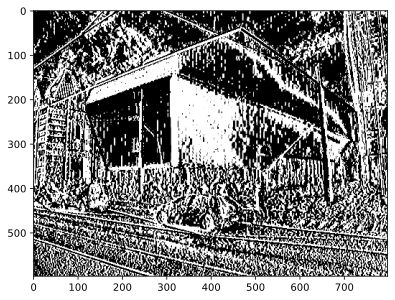

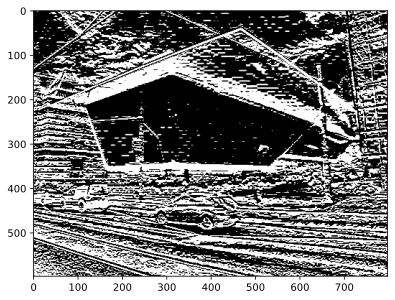

In [14]:
### displaying the convolution output
v_conv_tr=F.conv2d(image_tr,v_kernel_t)
h_conv_tr=F.conv2d(image_tr,h_kernel_t)


### reshaping the convolution output from pytorch
v_conv_tr=tr.squeeze(v_conv_tr.detach()) 
# tr.squeeze --> squeezes out 1D
# tr.detach --> uncouples the individual numerical values (used to get rid of gradient {usually})
plt.imshow(v_conv_tr,cmap="gray",vmax=1,vmin=0)
plt.show()
h_conv_tr=tr.squeeze(h_conv_tr.detach())
plt.imshow(h_conv_tr,cmap="gray",vmax=1,vmin=0)
plt.show()

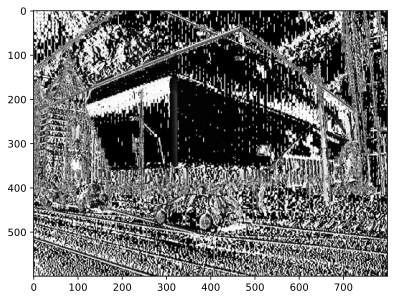

In [15]:
### To figure out why scipy/pytorch output is different from manual convolution output 
### Constructing the convolution differently such that output is stored at top corners for every iteration instead of center pixel (referred & created using chatgpt)
import numpy as np

def manual_convolve2d(image, kernel):
    """
    Perform 2D convolution on an image using a kernel.

    Parameters:
        image (ndarray): Input 2D image.
        kernel (ndarray): Convolution kernel.

    Returns:
        ndarray: Convolved image.
    """
    # Get dimensions of image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding sizes
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Initialize output image
    convolved_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest from the padded image
            roi = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Perform element-wise multiplication and sum
            convolved_image[i, j] = np.sum(roi * kernel)

    return convolved_image
image3=imread("https://johannesvermeer.info/wp-content/uploads/2017/01/ams-stedelijk8664bathtub.jpg")

v_kernel=np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])
h_kernel=np.array([[1,1,1],
                   [0,0,0],
                   [-1,-1,-1]])
plt.imshow(manual_convolve2d(cv.cvtColor(image3,cv.COLOR_RGB2GRAY),v_kernel),cmap="gray")
plt.show()

**Additional Explorations**

In [16]:
# 1) Try creating your own convolution kernels! It's fun and easy ;) Note that image kernels are often crafted to sum to zero, which prevents a global shift in the result. But you don't need to follow that convention.